# Waiter Tips Prediction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor , ElasticNet ,BayesianRidge
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

c:\Program Files\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# data = pd.read_csv("tips.csv")
data = pd.read_csv("insurance.csv")

In [20]:
df = pd.DataFrame(data)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df.describe().style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
print(df.iloc[1,-1])
print(np.log(df.iloc[1,-1]))
print(np.exp(np.log(df.iloc[1,-1])))

1725.5523
7.453302452133774
1725.5522999999994


In [24]:
df2 = df

In [25]:
df2["charges"] = np.log1p(df['charges'])

In [26]:
df2.describe().style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,9.098828
std,14.049960,6.098187,1.205493,0.919379
min,18.000000,15.960000,0.000000,7.023647
25%,27.000000,26.296250,0.000000,8.464064
50%,39.000000,30.400000,1.000000,9.146658
75%,51.000000,34.693750,2.000000,9.719618
max,64.000000,53.130000,5.000000,11.063061


In [27]:
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<Axes: xlabel='charges', ylabel='Density'>

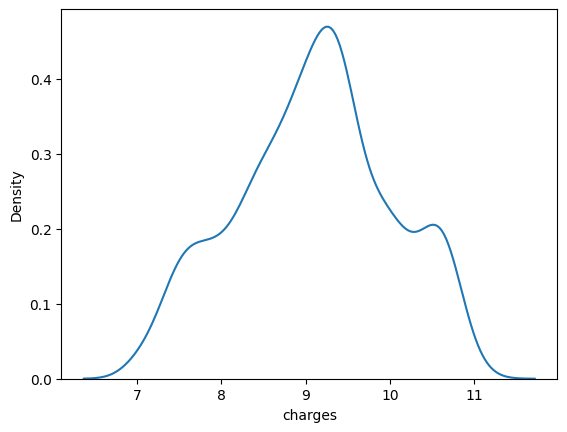

In [28]:
sns.kdeplot(df["charges"])

<Axes: xlabel='charges', ylabel='Density'>

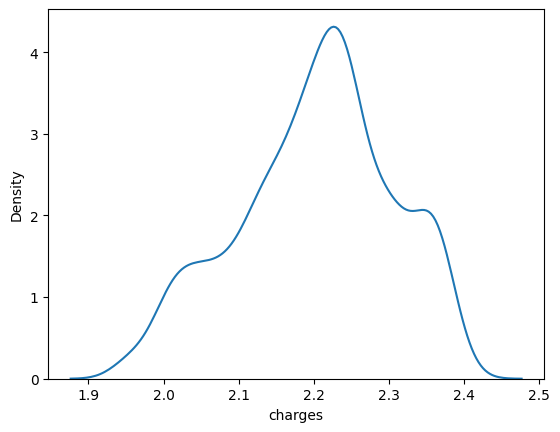

In [29]:
sns.kdeplot(np.log(df['charges']))

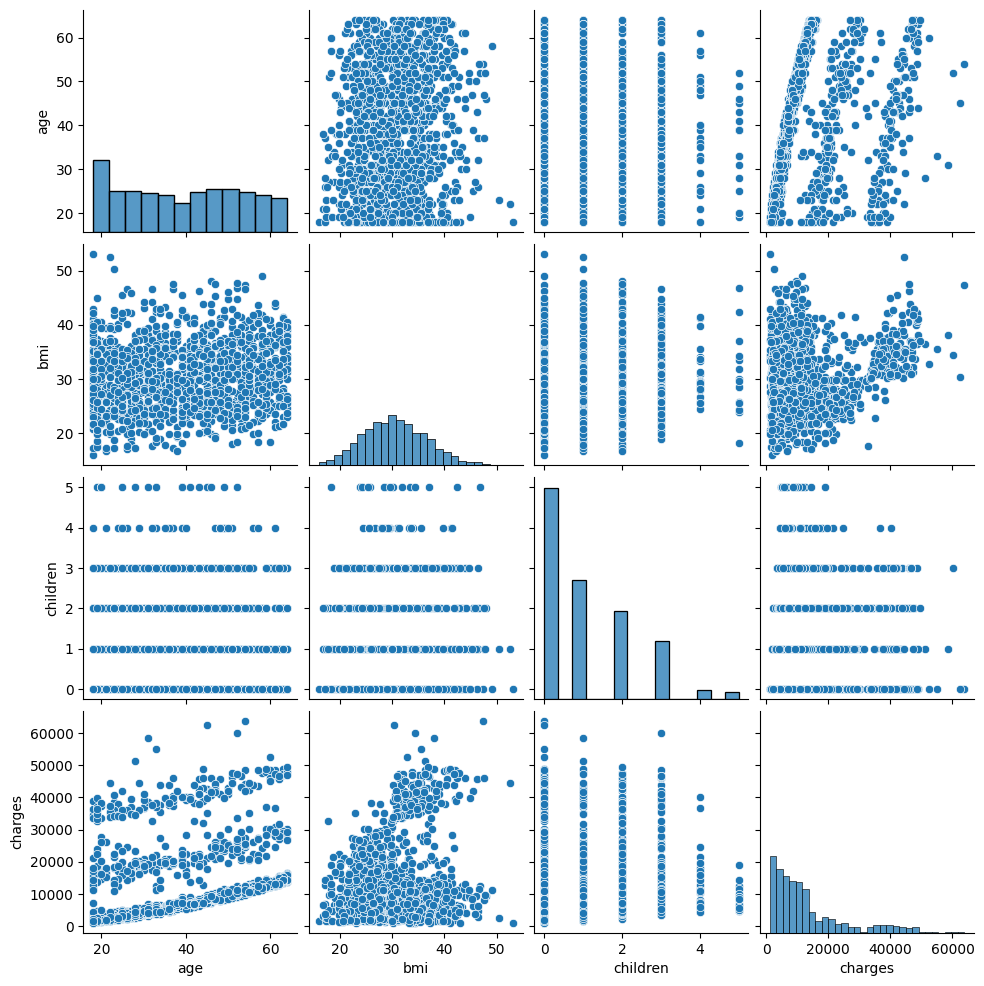

In [7]:
sns.pairplot(df)

In [30]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
124,47,female,33.915,3,no,northwest,9.221874


In [31]:
figure = px.scatter(
    data_frame=df, x="bmi", y="charges", size="children", color="sex", trendline="ols"
)
figure.show()

In [32]:
figure = px.scatter(
    data_frame=df, x="bmi", y="charges", size="children", color="smoker", trendline="ols"
)
figure.show()

In [26]:
figure = px.scatter(    
    data_frame=df, x="bmi", y="age", size="children", color="sex", trendline="ols"
)
figure.show()

In [33]:
figure = px.scatter(
    data_frame=data,
    x="age",
    y="charges",
    size="age",
    color="sex",
    trendline="ols",
)
figure.show()

In [44]:
figure = px.pie(df, values="charges", names="sex", hole=.5)
figure.show()

In [43]:
figure = px.pie(df, values="charges", names="smoker", hole=0.5)
figure.show()

In [45]:
figure = px.pie(df, values="charges", names="children", hole=0.5)
figure.show()

In [47]:
figure = px.pie(df, values="charges", names="region", hole=0.5)
figure.show()

In [50]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Label Encoder

In [34]:
sex_le = LabelEncoder()
smoker_le = LabelEncoder()
region_le = LabelEncoder()

df["sex"] = sex_le.fit_transform(df["sex"])
df["smoker"] = smoker_le.fit_transform(df["smoker"])
df["region"] = region_le.fit_transform(df["region"])

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [398]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


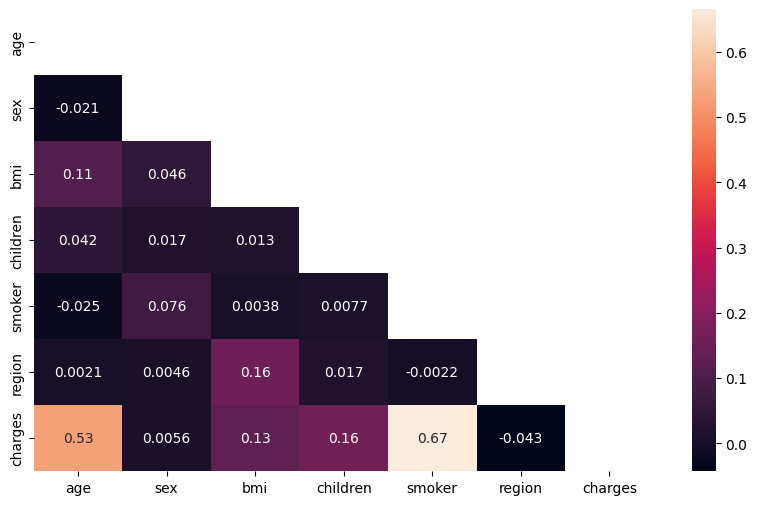

In [37]:
plt.figure(figsize=(10,6))


mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

## Linear regression

In [55]:
df['charges'] = np.log1p(df['charges']) 

In [56]:
x = np.array(df.drop(["charges","region"],axis=1))
y = np.array(df["charges"])

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size= 0.2, random_state=42 )

### Make Standard Scaler

In [33]:
df.sample(2)

,age,sex,bmi,children,smoker,region,charges
232,19,0,17.8,0,0,3,2.134779
210,20,1,33.0,1,0,3,2.150761


In [58]:
scaler = RobustScaler()

In [59]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest) # not true to use this for test data

In [60]:
# Linear Regression
model = LinearRegression()

In [61]:
model.fit(xtrain, ytrain)

LinearRegression()

### Test the regression model

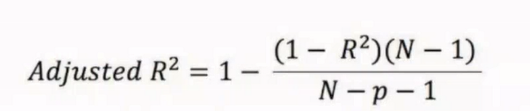

In [45]:
def get_score(model, ypred):
    
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2
    rmse = np.sqrt(mse)
    
    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
#    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

   # print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [62]:
ypred = model.predict(xtest)

In [63]:
get_score(model, ypred) # type: ignore

Socre for Test data: 0.7862551187648905
Socre for Train data: 0.7397358712433804
Cofeciant of modern: [ 0.03030753 -0.00299378  0.00275353  0.00734779  0.05153977]
----------------------------------------------------------------------------------------------------
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Model Interpretection : 1.1517094092859685
----------------------------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.00023525275759513162
Root Mean Squared Error (RMSE): 0.01533795154494666
R-squared (R²): 0.7862551187648905
R-adj : 0.21374488123510949


In [64]:
df_test = pd.DataFrame({
    "y_pred": ypred,
    "y_obser": ytest
    })

In [65]:
fig = px.line(df_test[:70], title="Comparison Between Y_pred and Y_obser",markers=True)
fig.show()

In [451]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [50]:
df.loc[1300].tolist()

[45.0, 1.0, 30.36, 0.0, 1.0, 2.0, 2.401925565550011]

In [51]:
print(xtest[:1])
print("-"*100)
print(ytest[:1])

[[ 0.22916667 -1.         -0.6072667   0.5         0.         -2.        ]]
----------------------------------------------------------------------------------------------------
[2.20998696]


In [52]:
charges = [45.0, 1.0, 30.36, 0.0, 1.0, 2.0,]
scaled_charges = scaler.transform(np.array(charges).reshape(1, -1))

prediction = model.predict(scaled_charges)
print(prediction)

[2.33912873]


In [96]:
charges = [ 0.22916667 ,-1.   ,      -0.6072667  , 0.5    ,     0.    ,     -2.        ]
model.predict(np.array(charges).reshape(1,-1))

array([2.31315002])

### Feature Selection Tests ###

In [66]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y = df["charges"]

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Combine the training data back into a DataFrame for statsmodels
train_data = pd.DataFrame(xtrain, columns=X.columns)
train_data["charges"] = ytrain

# Fit the full model
full_model = ols(
    "charges ~ age + sex + smoker + bmi + children + region", data=train_data
).fit()

# List of all parameters
params = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Perform the partial F-test for each parameter
for param in params:
    # Create a formula for the reduced model by excluding the current parameter
    reduced_formula = "charges ~ " + " + ".join([p for p in params if p != param])
    reduced_model = ols(reduced_formula, data=train_data).fit()

    # Perform the partial F-test
    f_test = full_model.compare_f_test(reduced_model)

    print(f"Testing exclusion of parameter: {param}")
    print("F-statistic:", f_test[0])
    print("p-value:", f_test[1])
    print("Degrees of freedom difference:", f_test[2])
    print("-" * 50)

    # Interpretation
    if f_test[1] < 0.05:
        print(f"The parameter '{param}' significantly improves the model.")
    else:
        print(f"The parameter '{param}' does not significantly improve the model.")
    print("=" * 50)
    print("")

Testing exclusion of parameter: age
F-statistic: 1255.9182289331875
p-value: 2.982706249989911e-182
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'age' significantly improves the model.

Testing exclusion of parameter: sex
F-statistic: 9.45806526243251
p-value: 0.0021559209887559287
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'sex' significantly improves the model.

Testing exclusion of parameter: bmi
F-statistic: 20.897510385601894
p-value: 5.413745282063705e-06
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'bmi' significantly improves the model.

Testing exclusion of parameter: children
F-statistic: 80.07594785623459
p-value: 1.5708142580521826e-18
Degrees of freedom difference: 1.0
--------------------------------------------------
The parameter 'children' significantly improves the model.

Testing exclusion of parameter:

### Linear Regression Without Improve the model Variable

In [310]:
x = np.array(df.drop(["charges","region","sex"],axis=1))
y = np.array(df["charges"])

In [311]:
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size= 0.2, random_state=42 )

In [312]:
model.fit(xtrain, ytrain)

LinearRegression()

In [313]:
ypred = model.predict(xtest)

In [314]:
get_score(model, ypred)

Socre for Test data: 0.7962736124501595
Socre for Train data: 0.7522525676737585
Cofeciant of modern: [0.03431907 0.01138379 0.09250893 1.54361368]
----------------------------------------------------------------------------------------------------
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Model Interpretection : 6.995069701562359
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 0.27705742058515637
Mean Squared Error (MSE): 0.18312011820011442
R-squared (R²): 0.7962736124501595
R-adj : 0.20372638754984052


In [315]:
df_test = pd.DataFrame({
    "y_pred": ypred,
    "y_obser": ytest
    })

In [67]:
fig = px.line(df_test[:70], title="Comparison Between Y_pred and Y_obser",markers=True)
fig.show()

In [209]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
651,53,0,39.6,1,0,2,10579.711


In [212]:
features = np.array([[53, 39.6, 1, 0,]])
model.predict(features)

array([14904.7924596])

In [71]:
# Predict values
ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

# Scatter plot for training data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(ytrain, ytrain_pred, color="blue", edgecolor="k", alpha=0.6)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Training Data: Actual vs. Predicted Tips")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # Diagonal line

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(ytest, ytest_pred, color="green", edgecolor="k", alpha=0.6)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Test Data: Actual vs. Predicted Tips")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # Diagonal line

plt.tight_layout()
plt.show()

ValueError: X has 6 features, but LinearRegression is expecting 5 features as input.

### Ols Table

In [26]:
ols_model = sm.OLS(ytrain, xtrain).fit()
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              312.4
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                   1.21e-230
Time:                        10:33:02   Log-Likelihood:                         -3344.6
No. Observations:                1070   AIC:                                      6701.
Df Residuals:                    1064   BIC:                                      6731.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

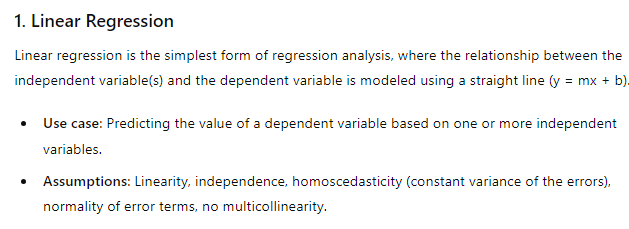

### Ridge Regression

In [339]:
x = np.array(df.drop("charges",axis=1))
y = np.array(df["charges"])

In [340]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [341]:
# Ridge Regression
ridge_reg = Ridge()

In [342]:
ridge_reg.fit(xtrain, ytrain)

Ridge()

In [343]:
ypred = ridge_reg.predict(xtest)

In [344]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [345]:
get_score(ridge_reg, ypred)

Socre for Test data: 0.8024908060502257
Socre for Train data: 0.7566599931231678
Cofeciant of modern: [ 0.03428388 -0.07320069  0.01283064  0.09263668  1.53999684 -0.04432984]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Model Interpretection : 7.057198048899915
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 0.2713317361862436
Mean Squared Error (MSE): 0.17753177375141801
R-squared (R²): 0.8024908060502257
R-adj : 0.1975091939497743


In [346]:
df_test = pd.DataFrame({
    "y_pred": ypred,
    "y_obser": ytest
    })

In [347]:
fig = px.line(df_test[:70], title="Comparison Between Y_pred and Y_obser",markers=True)
fig.show()

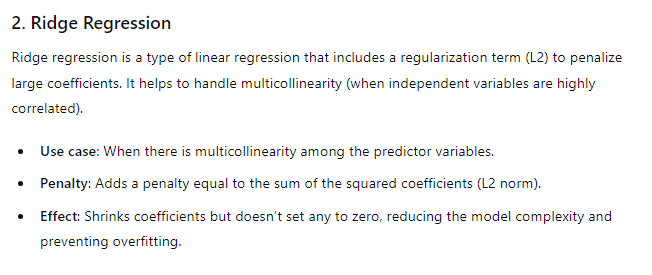

### Lasso Regression

In [227]:
x = np.array(df.drop("charges",axis=1))
y = np.array(df["charges"])

In [348]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [349]:
# Lasso Regression
lasso_reg = Lasso()

In [350]:
lasso_reg.fit(xtrain, ytrain)

Lasso()

In [351]:
ypred = lasso_reg.predict(xtest)

In [352]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
    #    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [353]:
get_score(lasso_reg, ypred)

Socre for Test data: 0.315791968990063
Socre for Train data: 0.2547791578829248
Cofeciant of modern: [ 0.02802389  0.          0.          0.          0.         -0.        ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interpretection : 8.010552333867482
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 0.6399268805600041
Mean Squared Error (MSE): 0.615002587631684
R-squared (R²): 0.315791968990063
R-adj : 0.684208031009937


In [354]:
df_test = pd.DataFrame({"y_pred": ypred, "y_obser": ytest})

In [355]:
fig = px.line(df_test[:70], title="Comparison Between Y_pred and Y_obser",markers=True)
fig.show()

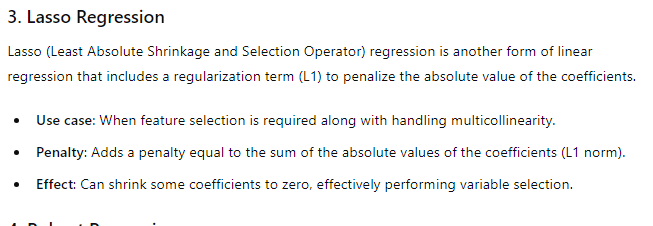

### Robust Regression

In [356]:
x = np.array(df.drop("charges",axis=1))
y = np.array(df["charges"])

In [357]:
x = np.array(df.drop(["charges","region","sex"],axis=1))
y = np.array(df["charges"])

In [358]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [359]:
# Robust Regression
huber_reg = HuberRegressor()

In [360]:
huber_reg.fit(xtrain, ytrain)

HuberRegressor()

In [361]:
ypred = huber_reg.predict(xtest)

In [362]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

#    print(f"Socre for Test data: {model.score(xtest, ytest)}")
#    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
    #    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    # print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [363]:
get_score(lasso_reg, ypred)

Cofeciant of modern: [ 0.02802389  0.          0.          0.          0.         -0.        ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interpretection : 8.010552333867482
----------------------------------------------------------------------------------------------------
Mean Squared Error (MSE): 0.18452077253558533
R-squared (R²): 0.7947153442993073
R-adj : 0.20528465570069265


In [364]:
df_test = pd.DataFrame({"y_pred": ypred, "y_obser": ytest})

In [365]:
fig = px.line(df_test[:70], title="Comparison Between Y_pred and Y_obser", markers=True)
fig.show()

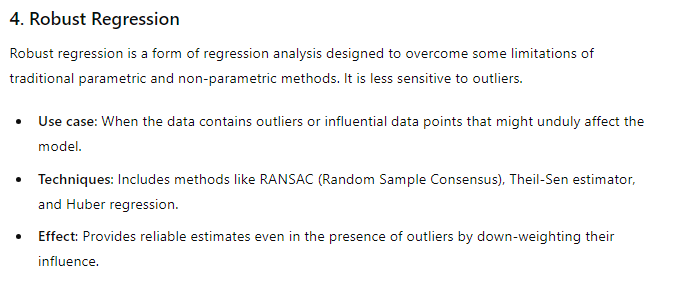

In [275]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [274]:
x = np.array(df.drop("charges",axis=1))
y = np.array(df["charges"])

In [276]:
X_df = pd.DataFrame(x, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
X_with_const = sm.add_constant(X_df)
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns

# Calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X_with_const.values, i)
    for i in range(X_with_const.shape[1])
]
print(vif_data)

    feature        VIF
0     const  33.241509
1       age   1.015394
2       sex   1.008889
3       bmi   1.040608
4  children   1.002482
5    smoker   1.006466
6    region   1.025966


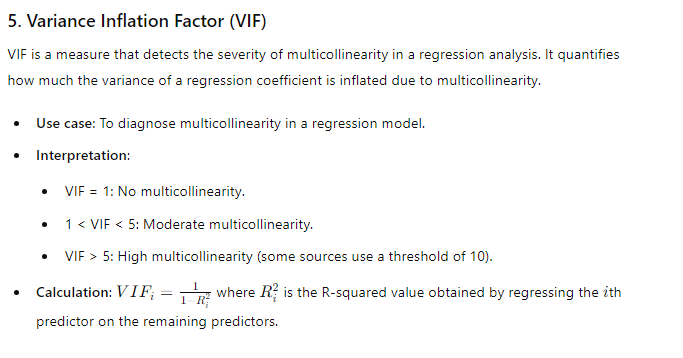

### Elastic Net  Model

In [277]:
#  Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  

In [278]:
elastic_net_model.fit(xtrain, ytrain)

ElasticNet()

In [279]:
ypred = elastic_net_model.predict(xtest)

In [280]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
#    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [281]:
get_score(elastic_net_model,ypred)

Socre for Test data: 0.4174164297454733
Socre for Train data: 0.3817609023856079
Cofeciant of modern: [ 230.04671429  326.32978213  395.17664329 5811.6603719 ]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Model Interpretection : -7313.198430336104
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 7447.042832835898
Mean Squared Error (MSE): 90445360.26996376
R-squared (R²): 0.4174164297454733
R-adj : 0.5825835702545267


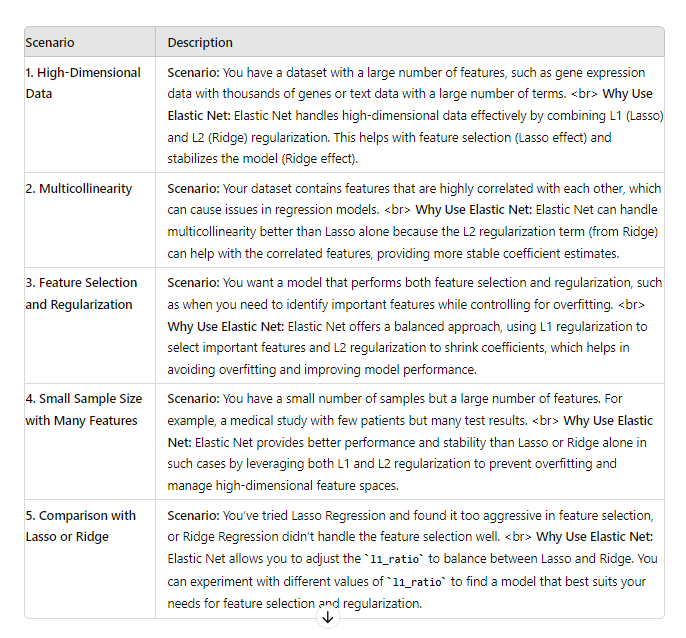

### Bayesian ridge model

In [282]:
bayesian_ridge_model = BayesianRidge()

In [283]:
bayesian_ridge_model.fit(xtrain, ytrain)

BayesianRidge()

In [284]:
ypred = bayesian_ridge_model.predict(xtest)

In [285]:
def get_score(model, ypred):

    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    r2_adj = 1 - r2

    print(f"Socre for Test data: {model.score(xtest, ytest)}")
    print(f"Socre for Train data: {model.score(xtrain, ytrain)}")
    print(f"Cofeciant of modern: {model.coef_}")

    print("-" * 100)

    print(f"Model Parameters: {model.get_params()}")
    print(f"Model Interpretection : {model.intercept_}")
    #    print(f"Model Rank : {model.rank_}")

    print("-" * 100)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")
    print(f"R-adj : {r2_adj}")

In [286]:
get_score(bayesian_ridge_model,ypred)

Socre for Test data: 0.7810530403847126
Socre for Train data: 0.7410872536582146
Cofeciant of modern: [  257.01542344   327.5274595    427.33626074 23616.79200844]
----------------------------------------------------------------------------------------------------
Model Parameters: {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'alpha_init': None, 'compute_score': False, 'copy_X': True, 'fit_intercept': True, 'lambda_1': 1e-06, 'lambda_2': 1e-06, 'lambda_init': None, 'n_iter': 300, 'tol': 0.001, 'verbose': False}
Model Interpretection : -12107.691876180425
----------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE): 4217.010591249268
Mean Squared Error (MSE): 33991237.744253926
R-squared (R²): 0.7810530403847126
R-adj : 0.21894695961528743


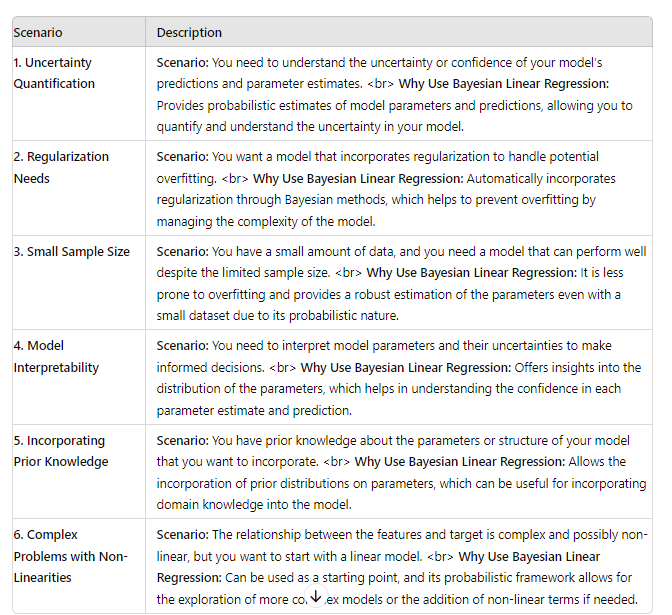

## Summary information

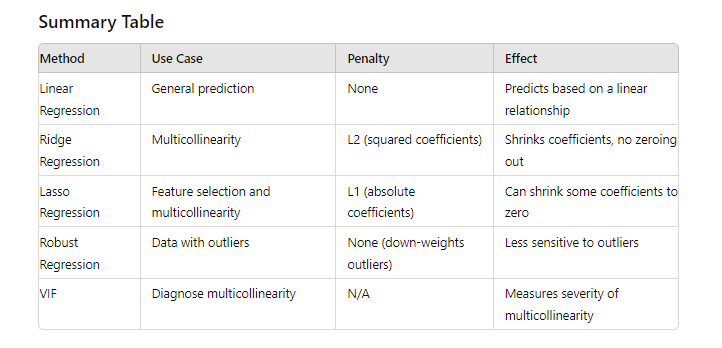